In [2]:
!pip install requests

In [2]:
import requests
url = 'http://www.gutenberg.org/files/2591/2591-0.txt'
res = requests.get(url)

res.status_code

200

In [3]:
res.text[:100]

'ï»¿The Project Gutenberg eBook of Grimmsâ\x80\x99 Fairy Tales, by Jacob Grimm and Wilhelm Grimm\r\n\r\nThis eB'

In [4]:
import re
words = re.findall(r'[a-zA-z]+', res.text)

In [5]:
words[:10]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Grimms',
 'Fairy',
 'Tales',
 'by',
 'Jacob']

In [6]:
word_count = {}
for word in words:
    word = word.lower()
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1

In [7]:
word_count['wrong']

3

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame(list(word_count.items()), columns = ['word', 'n'])

In [10]:
df.head()

,word,n
0,the,7232
1,project,89
2,gutenberg,97
3,ebook,12
4,of,1493


In [11]:
df.sort_values('n', ascending=False).head()

,word,n
0,the,7232
11,and,5551
54,to,2751
272,he,2096
233,a,1978


In [12]:
%matplotlib inline

In [13]:
import sys
print(sys.executable)

C:\Users\User\anaconda3\python.exe


In [14]:
import matplotlib.pyplot as plt

In [15]:
from wordcloud import WordCloud

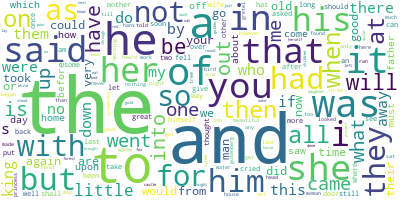

In [16]:
word_count = dict(zip(df.word, df.n))
wc = WordCloud(background_color = 'white', width=400, height=200)
cloud = wc.fit_words(word_count)
cloud.to_image()

In [17]:
import requests

In [18]:
res = requests.get("https://search.daum.net/search?w=news&nil_search=btn&DA=NTB&enc=utf8&cluster=y&cluster_page=1&q=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5")

In [19]:
import lxml.html

In [20]:
root = lxml.html.fromstring(res.text)

In [21]:
urls = []
for link in root.cssselect('a.f_nb'):
    urls.append(link.attrib['href'])

In [22]:
articles = []
for url in urls:
    if not url.startswith('http'):
        continue
    res = requests.get(url)
    root = lxml.html.fromstring(res.text)
    body = root.cssselect('.article_view').pop()
    content = body.text_content()
    articles.append(content)

In [23]:
df = pd.DataFrame({'article': articles})

In [24]:
df.head()

,article
0,\n \n \n \n ...
1,\n \n 얼마 전에 기분 좋은 뉴스를 봤다. 우리...
2,\n \n \n \n ...
3,\n \n \n \n ...
4,\n \n \n \n ...


In [25]:
df.to_excel('ai기사.xlsx')

In [26]:
murl = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=81888&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}'

In [27]:
reviews = []
scores = []
for page in range(1, 30):
    res = requests.get(murl.format(page))
    root = lxml.html.fromstring(res. text)
    
    for review in root.cssselect('.score_reple p'):
        reviews.append(review.text_content())
    
    for score in root.cssselect('.score_result .star_score em'):
        scores.append(score.text_content())

In [28]:
m_df = pd.DataFrame({"score":scores, "review": reviews})

In [29]:
m_df.head()

,score,review
0,10,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t관람객\r\n\t\t\t\t\...
1,10,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t관람객\r\n\t\t\t\t\...
2,10,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t관람객\r\n\t\t\t\t\...
3,10,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t관람객\r\n\t\t\t\t\...
4,10,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t관람객\r\n\t\t\t\t\...


In [31]:
m_df.to_csv('movie_review.csv', encoding = 'utf8', index = False)

In [33]:
review_star = pd.read_csv("movie_review.csv", encoding = 'utf8')

In [36]:
review_star.tail()

,score,review
285,10,관람객결국에이영화를죽어도극장에서보게한톰크루즈의뚝심에박수를보내게된다
286,10,관람객탑건1개봉했을땐태어나지도않았던사람인데도너무재밌어서집에와서탑건1보고또보러갔다만점...
287,10,관람객마블광팬인데도오랜만에CG에절여지지않은영화를보니감동이더욱크네요유료시사로보고용아맥...
288,10,관람객원래댓글잘안다는데너무재밌게봐서댓글남겨요명작입니다
289,10,관람객말이필요없다역대최고의액션배우탐크루즈꼭영화관에서봐야될영화


In [35]:
review_star['review'] = m_df['review'].str.replace(pat=r'[^A-Za-z0-9가-힣+]', repl=r'', regex = True)